In [1]:
import keras
import sklearn
import numpy as np
import pandas as pd

Using TensorFlow backend.
/home/abicharanb/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/abicharanb/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/abicharanb/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/abicharanb/.local/lib/python3.6/site-packages/t

In [2]:
#reading the necessary files
df_reviewContent = pd.read_csv("~/Documents/P2/TrainModels/data/yelp/review.csv")
df_labelContent = pd.read_csv("~/Documents/P2/TrainModels/data/yelp/label.csv")

In [3]:
df_combined= pd.concat([df_reviewContent, df_labelContent], axis =1, join="inner")
df_trainData = df_combined[["label", "review"]]

df_trainNO = df_trainData.loc[df_trainData['label']== -1][:36000].replace(-1, value=0)
df_trainO = df_trainData.loc[df_trainData['label']== 1][:36000]

df_train = pd.concat([df_trainNO, df_trainO], ignore_index = True)
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [4]:
df_train

,label,review
0,0,"Pros: Delicious brisket & ribs, Shiner cans (t..."
1,0,Ate there last week and was pleasantly surpris...
2,0,Had the worse case of food poisoning after eat...
3,0,Wow...that pretty much sums it up. The service...
4,0,Love the way the food is presented and the lou...
...,...,...
71995,1,This is my favorite of the Pio Pios. I just lo...
71996,1,Great French food! Fresh menu for summer
71997,0,"I really want to give Mamoun's 4-5 stars, the ..."
71998,0,I come by Mompou for sangria and cocktails for...


In [5]:
!pip3 install nltk

  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl


In [5]:
import pandas as pd
import numpy as np
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.svm import LinearSVC

from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer



In [5]:
train_data =  list(df_train['review'])    # text

In [6]:
transformer = TfidfVectorizer(stop_words ='english', ngram_range=(2,2)) 

In [7]:
cvectorizer = transformer.fit(df_train['review'])
transformed = cvectorizer.transform(df_train['review'])

In [8]:
clf = LinearSVC()
clf.fit(transformed,df_train['label'])
    
coefficients = clf.coef_.ravel()
pos_coefficients = np.argsort(coefficients )[-10:]
neg_coefficients = np.argsort(coefficients )[:10]
combine = np.hstack([neg_coefficients, pos_coefficients])
    

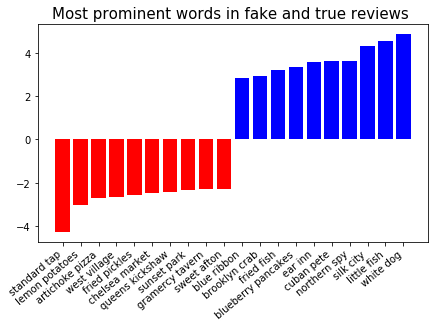

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(7, 4))
colors = ['red' if i < 0 else 'blue' for i in coefficients[combine]]
plt.bar(np.arange(2 * 10), coefficients[combine], color=colors)
feature_names = np.array(cvectorizer.get_feature_names())
    
plt.title('Most prominent words in fake and true reviews ', fontsize = 15)
plt.xticks(np.arange( 0, 2 * 10), feature_names[combine], rotation=40, ha='right')
plt.show()
plt.savefig('books_read.png')

In [1]:
!pip3 install pandas
import pandas as pd

path = '~/Documents/P2/TrainModels/data/yelp/YelpDataSetOfficial'

business = pd.read_csv(path+'/businessData.csv')
reviews = pd.read_csv(path+'/yelpReview.csv')

  Using cached https://files.pythonhosted.org/packages/12/d1/a6502c2f5c15b50f5dd579fc1c52b47edf6f2e9f682aed917dd7565b3e60/pandas-1.0.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e7/f9/f0b53f88060247251bf481fa6ea62cd0d25bf1b11a87888e53ce5b7c8ad2/pytz-2019.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/62/20/4d43e141b5bc426ba38274933ef8e76e85c7adea2c321ecf9ebf7421cedf/numpy-1.18.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl


In [ ]:
secretPizza = reviews.loc[reviews['business_id']== 'iCQpiavjjPzJ5_3gPD5Ebg']

In [ ]:
secretPizza

In [ ]:
def change_label(x):
    for i in range(len(x)):
        if x[i] >= 3.0:    # good review: stars >=3.0
            x[i] = 1
        else:              # bad review: stars 3.0
            x[i] = 0
    return x

In [ ]:
    train_data =  list(secretPizza['text'])    # text
    label = list(secretPizza['stars'])           # ratings
    train_label = change_label(label)
    
    # TfidfVectorizer Transform
    transformer = TfidfVectorizer(stop_words ='english', ngram_range=(2,2))  # "ignore terms that appear in less than 1% of the documents".
    cvectorizer = transformer.fit(secretPizza['text'])
    transformed = cvectorizer.transform(secretPizza['text'])
    
    # SVM regression
    clf = LinearSVC()
    clf.fit(transformed,train_label)
    
    #flatten the array
    coefficients = clf.coef_.ravel()
    
    #starts at -10
    pos_coefficients = np.argsort(coefficients )[-10:]
    
    #stops after 10 indexes 
    neg_coefficients = np.argsort(coefficients )[:10]
    
    #combines both the positive and negative coefficients 
    combine = np.hstack([neg_coefficients, pos_coefficients])
    
    plt.figure(figsize=(7, 4))
    colors = ['red' if i < 0 else 'blue' for i in coefficients[combine]]
    plt.bar(np.arange(2 * 10), coefficients[combine], color=colors)
    feature_names = np.array(cvectorizer.get_feature_names())
    
    plt.title('Negative/Positive features about the restaurant', fontsize = 15)
    plt.xticks(np.arange( 0, 2 * 10), feature_names[combine], rotation=40, ha='right')
    plt.show()

In [ ]:
feature_names[combine]

In [9]:
def feature_extraction(res_id, review_type):
    selected = reviews.loc[reviews['business_id']== res_id]
    
    train_data =  list(selected['text'])    # text
    label = list(selected['stars'])           # ratings
    train_label = change_label(label)
    
    # TfidfVectorizer Transform
    transformer = TfidfVectorizer(stop_words ='english', ngram_range=(2,2))  # "ignore terms that appear in less than 1% of the documents".
    cvectorizer = transformer.fit(selected['text'])
    transformed = cvectorizer.transform(selected['text'])
    
    # SVM regression
    clf = LinearSVC()
    clf.fit(transformed,train_label)
    
    #flatten the array
    coefficients = clf.coef_.ravel()
    
    #starts at -10
    pos_coefficients = np.argsort(coefficients )[-10:]
    
    #stops after 10 indexes 
    neg_coefficients = np.argsort(coefficients )[:10]
    
    #combines both the positive and negative coefficients 
    combine = np.hstack([neg_coefficients, pos_coefficients])
    feature_names = np.array(cvectorizer.get_feature_names())
    featurelist = feature_names[combine].tolist()
    
    if review_type == 0:
        return featurelist[:9]
    else:
        return featurelist[-10:]

In [10]:
def change_label(x):
    for i in range(len(x)):
        if x[i] >= 3.0:    # good review: stars >=3.0
            x[i] = 1
        else:              # bad review: stars 3.0
            x[i] = 0
    return x

In [17]:
feature_extraction('K7lWdNUhCbcnEvI0NhGewg',0)

['food poisoning',
 'worst buffet',
 'save money',
 'food mediocre',
 'food cold',
 'good thing',
 'waste money',
 'tasted like',
 'food just']

In [ ]:
#2 Earl of SandWich, ID: DkYS3arLOhA8si5uUEmHOw

#3 Gordon Ramsay BurGR, ID: cYwJA2A6I12KNkm2rtXd5g

#4 Wicked spoon, ID: K7lWdNUhCbcnEvI0NhGewg
